가설을 입력하세요

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

%matplotlib inline

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

import folium
from folium import Marker
from folium.plugins import MarkerCluster
# font_location = "C:\Windows\Fonts\malgun.ttf"
# font_name = font_manager.FontProperties(fname=font_location).get_name()
# rc('font',family=font_name)

In [2]:
def open_json(file_name, encoding):
    with open(file_name, encoding=encoding) as json_file: 
        json_object = json.load(json_file)
        json_string = json.dumps(json_object)
        json_data = json.loads(json_string)
    return json_data

In [3]:
json_data = open_json('전국도시공원정보표준데이터.json',encoding = 'utf-8')
#json_data

### => json 데이터를 불러온다

# 데이터 원본 분석

In [4]:
def get_df_info(json_data, records_root_name):
    column_list=[]
    all_data=[]
    is_first=True
    for record in json_data[records_root_name]:
        row_data_list=[]
        for key, value in record.items():
            if is_first:
                column_list.append(key)
            row_data_list.append(value)
        all_data.append(row_data_list)
        is_first=False
        
    return column_list, all_data

In [5]:
column_list, all_data = get_df_info(json_data,'records')

In [6]:
df = pd.DataFrame(all_data, columns=column_list)
df.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명
0,47190-00127,백현체육공원,체육공원,,경상북도 구미시 산동면 백현리 79,36.1864293331,128.4784906760,90967,,,,,,,,,2022-06-09,5080000,경상북도 구미시
1,47190-00128,둘모아공원,어린이공원,,경상북도 구미시 봉곡동 584-2,36.148431,128.3165938966,4279,,,,,,,,,2022-06-09,5080000,경상북도 구미시
2,47190-00129,다붓소공원,소공원,,경상북도 구미시 봉곡동 765 일원,36.155883,128.311526,805,,,,,,,,,2022-06-09,5080000,경상북도 구미시
3,47190-00130,다붓1공원,어린이공원,,경상북도 구미시 봉곡동 457-1,36.156392,128.314372,1585,,,,,,,,,2022-06-09,5080000,경상북도 구미시
4,47190-00131,다붓2공원,어린이공원,,경상북도 구미시 봉곡동 767,36.1548081316,128.314372,1637,,,,,,,,,2022-06-09,5080000,경상북도 구미시


### => json파일을 Df형식으로 만들어 주었다

In [7]:
df.shape

(16764, 19)

In [8]:
df= df[['공원명','공원구분','위도','경도','소재지지번주소','공원보유시설(운동시설)','공원보유시설(유희시설)','공원보유시설(편익시설)','공원보유시설(교양시설)','공원보유시설(기타시설)']]
df

,공원명,공원구분,위도,경도,소재지지번주소,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설)
0,백현체육공원,체육공원,36.1864293331,128.4784906760,경상북도 구미시 산동면 백현리 79,,,,,
1,둘모아공원,어린이공원,36.148431,128.3165938966,경상북도 구미시 봉곡동 584-2,,,,,
2,다붓소공원,소공원,36.155883,128.311526,경상북도 구미시 봉곡동 765 일원,,,,,
3,다붓1공원,어린이공원,36.156392,128.314372,경상북도 구미시 봉곡동 457-1,,,,,
4,다붓2공원,어린이공원,36.1548081316,128.314372,경상북도 구미시 봉곡동 767,,,,,
...,...,...,...,...,...,...,...,...,...,...
16759,오랏공원,어린이공원,36.348581,126.608418,충청남도 보령시 동대동 1607,농구장+운동시설(7종),조합놀이대+흔들놀이기구,정자+파고라+의자+화장실,,
16760,샛별공원,어린이공원,36.34756191,126.604487,충청남도 보령시 동대동 1757,운동시설(4종),조합놀이대,파고라+의자+화장실,,
16761,동대2공원,근린공원,36.351672,126.613315,충청남도 보령시 동대동 319-34,농구장,,정자,,
16762,한성필공원,어린이공원,36.35119229,126.6160855,충청남도 보령시 동대동 1971,,조합놀이대+시소+그네,정자,,


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16764 entries, 0 to 16763
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   공원명           16764 non-null  object
 1   공원구분          16764 non-null  object
 2   위도            16764 non-null  object
 3   경도            16764 non-null  object
 4   소재지지번주소       16764 non-null  object
 5   공원보유시설(운동시설)  16764 non-null  object
 6   공원보유시설(유희시설)  16764 non-null  object
 7   공원보유시설(편익시설)  16764 non-null  object
 8   공원보유시설(교양시설)  16764 non-null  object
 9   공원보유시설(기타시설)  16764 non-null  object
dtypes: object(10)
memory usage: 1.3+ MB


### => df의 위도와 경도는 float 타입으로 변환해줘야 한다

In [10]:
df.isnull().sum()

공원명             0
공원구분            0
위도              0
경도              0
소재지지번주소         0
공원보유시설(운동시설)    0
공원보유시설(유희시설)    0
공원보유시설(편익시설)    0
공원보유시설(교양시설)    0
공원보유시설(기타시설)    0
dtype: int64

In [11]:
df = df[(df['경도'] != "") & (df['위도'] != "")]

In [12]:
len(df)

16606

In [13]:
df['위도'] = df['위도'].astype('float')
df['경도'] = df['경도'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16606 entries, 0 to 16763
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   공원명           16606 non-null  object 
 1   공원구분          16606 non-null  object 
 2   위도            16606 non-null  float64
 3   경도            16606 non-null  float64
 4   소재지지번주소       16606 non-null  object 
 5   공원보유시설(운동시설)  16606 non-null  object 
 6   공원보유시설(유희시설)  16606 non-null  object 
 7   공원보유시설(편익시설)  16606 non-null  object 
 8   공원보유시설(교양시설)  16606 non-null  object 
 9   공원보유시설(기타시설)  16606 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.4+ MB


/var/folders/j5/qjnwvgcx1mq568fwr0y_xbhr0000gn/T/ipykernel_64458/1932343848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['위도'] = df['위도'].astype('float')
/var/folders/j5/qjnwvgcx1mq568fwr0y_xbhr0000gn/T/ipykernel_64458/1932343848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['경도'] = df['경도'].astype('float')


### => 원본데이터 분석 끝

결측치, 이상치 처리방안 결정

In [14]:
df[df['소재지지번주소'] == '']

,공원명,공원구분,위도,경도,소재지지번주소,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설)
571,서림공원,근린공원,35.732919,126.731487,,,,,,
1832,별내택지어린이공원3,어린이공원,37.662716,127.116471,,,,,,
2127,본촌2,어린이공원,35.093155,126.776242,,,,,,
2180,온천공원,근린공원,37.280266,127.450371,,축구장+배드민턴장+농구장,조합놀이대,주차장+화장실,대공연장,
2181,수변공원,수변공원,37.268120,127.460527,,배드민턴장+족구장,조합놀이대,화장실,,
...,...,...,...,...,...,...,...,...,...,...
15768,소공원4,소공원,34.970122,127.486622,,,,,,
15769,소공원5,소공원,34.971059,127.477264,,,,,,
15770,소공원6,소공원,34.971797,127.494337,,,,,,
15771,소공원7,소공원,34.973273,127.483943,,,,,,


In [15]:
df[df['공원명']== '']

,공원명,공원구분,위도,경도,소재지지번주소,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설)


In [16]:
df[df['공원구분']== '']

,공원명,공원구분,위도,경도,소재지지번주소,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설)


In [17]:
len(df[df['공원보유시설(운동시설)']== ''])

11890

In [18]:
len(df[df['공원보유시설(유희시설)']== ''])

10529

In [19]:
len(df[df['공원보유시설(편익시설)']== ''])

11658

In [20]:
len(df[df['공원보유시설(교양시설)']== ''])

15833

In [21]:
len(df[df['공원보유시설(기타시설)']== ''])

14117

In [22]:
df = df.replace('','[시설미보유]')
df

,공원명,공원구분,위도,경도,소재지지번주소,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설)
0,백현체육공원,체육공원,36.186429,128.478491,경상북도 구미시 산동면 백현리 79,[시설미보유],[시설미보유],[시설미보유],[시설미보유],[시설미보유]
1,둘모아공원,어린이공원,36.148431,128.316594,경상북도 구미시 봉곡동 584-2,[시설미보유],[시설미보유],[시설미보유],[시설미보유],[시설미보유]
2,다붓소공원,소공원,36.155883,128.311526,경상북도 구미시 봉곡동 765 일원,[시설미보유],[시설미보유],[시설미보유],[시설미보유],[시설미보유]
3,다붓1공원,어린이공원,36.156392,128.314372,경상북도 구미시 봉곡동 457-1,[시설미보유],[시설미보유],[시설미보유],[시설미보유],[시설미보유]
4,다붓2공원,어린이공원,36.154808,128.314372,경상북도 구미시 봉곡동 767,[시설미보유],[시설미보유],[시설미보유],[시설미보유],[시설미보유]
...,...,...,...,...,...,...,...,...,...,...
16759,오랏공원,어린이공원,36.348581,126.608418,충청남도 보령시 동대동 1607,농구장+운동시설(7종),조합놀이대+흔들놀이기구,정자+파고라+의자+화장실,[시설미보유],[시설미보유]
16760,샛별공원,어린이공원,36.347562,126.604487,충청남도 보령시 동대동 1757,운동시설(4종),조합놀이대,파고라+의자+화장실,[시설미보유],[시설미보유]
16761,동대2공원,근린공원,36.351672,126.613315,충청남도 보령시 동대동 319-34,농구장,[시설미보유],정자,[시설미보유],[시설미보유]
16762,한성필공원,어린이공원,36.351192,126.616085,충청남도 보령시 동대동 1971,[시설미보유],조합놀이대+시소+그네,정자,[시설미보유],[시설미보유]


---

# Step1

In [23]:
df['공원구분'].unique()

array(['체육공원', '어린이공원', '소공원', '근린공원', '수변공원', '문화공원', '묘지공원', '역사공원',
       '기타', '도시자연공원구역', '도시농업공원', '기타공원', '주제공원', '도시자연공원', '마을숲',
       '마을마당'], dtype=object)

In [24]:
df['공원구분'].value_counts()

어린이공원       8832
근린공원        3783
소공원         2541
문화공원         359
수변공원         323
기타           232
체육공원         230
역사공원         177
마을마당          49
묘지공원          35
기타공원          30
도시농업공원         7
도시자연공원         3
도시자연공원구역       2
주제공원           2
마을숲            1
Name: 공원구분, dtype: int64

In [25]:
df['공원구분']=df['공원구분'].replace('기타공원','기타')
df['공원구분']=df['공원구분'].replace('마을마당','기타')
df['공원구분']=df['공원구분'].replace('묘지공원','기타')
df['공원구분']=df['공원구분'].replace('도시농업공원','기타')
df['공원구분']=df['공원구분'].replace('도시자연공원','기타')
df['공원구분']=df['공원구분'].replace('도시자연공원구역','기타')
df['공원구분']=df['공원구분'].replace('주제공원','기타')
df['공원구분']=df['공원구분'].replace('마을숲','기타')

df['공원구분'].value_counts()

어린이공원    8832
근린공원     3783
소공원      2541
기타        361
문화공원      359
수변공원      323
체육공원      230
역사공원      177
Name: 공원구분, dtype: int64

In [26]:
df['공원구분'].replace('기타공원','기타', inplace=True)
df['공원구분'].replace('마을마당','기타', inplace=True)
df['공원구분'].replace('묘지공원','기타', inplace=True)
df['공원구분'].replace('도시농업공원','기타', inplace=True)
df['공원구분'].replace('도시자연공원','기타', inplace=True)
df['공원구분'].replace('도시자연공원구역','기타', inplace=True)
df['공원구분'].replace('주제공원','기타', inplace=True)
df['공원구분'].replace('마을숲','기타', inplace=True)

df['공원구분'].value_counts()

어린이공원    8832
근린공원     3783
소공원      2541
기타        361
문화공원      359
수변공원      323
체육공원      230
역사공원      177
Name: 공원구분, dtype: int64

In [27]:
df['공원구분'].unique()

array(['체육공원', '어린이공원', '소공원', '근린공원', '수변공원', '문화공원', '기타', '역사공원'],
      dtype=object)

### => 공원분류 중 100건이 안되는 데이터는 기타로 묶어서 분류 해 주었다

In [28]:
park_list2=df.groupby('공원구분')['공원구분'].count().tolist()
park_list2

[3783, 361, 359, 2541, 323, 8832, 177, 230]

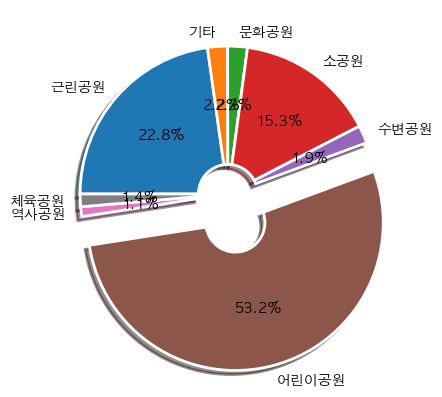

In [29]:
#plt.style.use('default')

labels = ['근린공원','기타','문화공원','소공원','수변공원','어린이공원','역사공원','체육공원']
explode = [0, 0,0, 0, 0, 0.2, 0, 0]
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 2}
plt.pie(park_list2, labels=labels, autopct='%.1f%%', startangle=180, counterclock=False, shadow = True, wedgeprops=wedgeprops,explode=explode)

plt.show()

In [38]:
# m = folium.Map(location=[37.541, 126.986],
#                zoom_start=11, 
#                width=750, 
#                height=650
#               )
# m

---

# Step2

In [35]:
transform_a = df[df['공원구분'] == '어린이공원']
transform_a=transform_a[transform_a['소재지지번주소'].str.contains('서울')]
transform_a

,공원명,공원구분,위도,경도,소재지지번주소,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설)
214,목련어린이공원,어린이공원,37.587380,126.880225,서울특별시 마포구 상암동1742,[시설미보유],[시설미보유],[시설미보유],[시설미보유],[시설미보유]
215,산수유어린이공원,어린이공원,37.585485,126.879008,서울특별시 마포구 상암동1744,[시설미보유],[시설미보유],[시설미보유],[시설미보유],[시설미보유]
216,산딸나무어린이공원,어린이공원,37.583547,126.877927,서울특별시 마포구 상암동1753,[시설미보유],[시설미보유],[시설미보유],[시설미보유],[시설미보유]
217,애오개도담어린이공원,어린이공원,37.553433,126.958529,서울특별시 마포구 아현동 800-6,[시설미보유],[시설미보유],[시설미보유],[시설미보유],[시설미보유]
218,쌍룡산어린이공원,어린이공원,37.552173,126.950512,서울특별시 마포구 아현동 769,[시설미보유],[시설미보유],[시설미보유],[시설미보유],[시설미보유]
...,...,...,...,...,...,...,...,...,...,...
15266,한 신,어린이공원,37.588130,127.076900,서울특별시 중랑구 면목3·8 30-38,[시설미보유],[시설미보유],[시설미보유],[시설미보유],[시설미보유]
15267,이 화,어린이공원,37.586990,127.100300,서울특별시 중랑구 상봉2 114-1,[시설미보유],[시설미보유],[시설미보유],[시설미보유],[시설미보유]
15268,면목1(가칭),어린이공원,37.580278,127.093056,서울특별시 중랑구 상봉2 122-31,[시설미보유],[시설미보유],[시설미보유],[시설미보유],[시설미보유]
15269,봉 황,어린이공원,37.595020,127.084800,서울특별시 중랑구 상봉2 136-35,[시설미보유],[시설미보유],[시설미보유],[시설미보유],[시설미보유]


In [37]:
for name, lat, lng, m_num  in zip(transform_a['공원구분'],transform_a['위도'],transform_a['경도'],transform_a['공원명']):
#     if kbn =='구립도서관' :
#         color = 'green'
#     else : 
#         color = 'blue'
    Marker(location =[lat,lng],
           popup=m_num,
           tooltip=m_num,
           icon=folium.Icon(color='orange',icon='bookmark')
           ).add_to(m)
#m

In [39]:
# #ab = transform_a['소재지지번주소'].tolist()[0].split()[1]
ab = transform_a['소재지지번주소'].tolist()

In [40]:
ab

['서울특별시 마포구 상암동1742',
 '서울특별시 마포구 상암동1744',
 '서울특별시 마포구 상암동1753',
 '서울특별시 마포구 아현동 800-6',
 '서울특별시 마포구 아현동 769',
 '서울특별시 마포구 용강동 63-2',
 '서울특별시 마포구 아현동 802번지 일대',
 '서울특별시 마포구 망원동 458-64',
 '서울특별시 마포구 창전동 26-1',
 '서울특별시 마포구 신수동 95-5일원',
 '서울특별시 마포구 서교동 479-1',
 '서울특별시 마포구 동교동 168-1',
 '서울특별시 마포구 동교동 197-17',
 '서울특별시 마포구 서교동 489',
 '서울특별시 마포구 합정동 394-1',
 '서울특별시 마포구 망원동 381-1',
 '서울특별시 마포구 망원동 408-3',
 '서울특별시 마포구 망원2동 436-1',
 '서울특별시 마포구 망원2동 509-1',
 '서울특별시 마포구 연남동 563-5',
 '서울특별시 마포구 연남동 250-1',
 '서울특별시 마포구 성산동 113-2',
 '서울특별시 마포구 성산동 588-8',
 '서울특별시 마포구 성산동 587-18 일대',
 '서울특별시 마포구 성산동 667-1',
 '서울특별시 마포구 성산동 147-5',
 '서울특별시 마포구 성산동 200-50',
 '서울특별시 마포구 성산동 200-335',
 '서울특별시 마포구 성산동 199-11',
 '서울특별시 마포구 중동 36-27',
 '서울특별시 마포구 중동 228',
 '서울특별시 마포구 중동 36-34',
 '서울특별시 마포구 중동 40-5 일대',
 '서울특별시 마포구 상암동 1619',
 '서울특별시 마포구 상암동 14-5',
 '서울특별시 마포구 상암동 1636',
 '서울특별시 마포구 상암동 1656',
 '서울특별시 마포구 상암동 1681',
 '서울특별시 동작구 상도동 36-1',
 '서울특별시 동작구 상도1동 558',
 '서울특별시 마포구 공덕동 470-1',
 '서울특별시 마포구 공덕동 467-1,2

In [41]:
ab_list=[]
for i in ab : 
    ab_list.append(i.split()[1])
ab_list

['마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '동작구',
 '동작구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '동작구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '양천구',
 '양천구',
 '양천구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '양천구',
 '양천구',
 '강동구',
 '강동구',
 '강동구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '양천구',


In [42]:
transform_a['행정구별'] = ab_list
transform_a

,공원명,공원구분,위도,경도,소재지지번주소,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),행정구별
214,목련어린이공원,어린이공원,37.587380,126.880225,서울특별시 마포구 상암동1742,[시설미보유],[시설미보유],[시설미보유],[시설미보유],[시설미보유],마포구
215,산수유어린이공원,어린이공원,37.585485,126.879008,서울특별시 마포구 상암동1744,[시설미보유],[시설미보유],[시설미보유],[시설미보유],[시설미보유],마포구
216,산딸나무어린이공원,어린이공원,37.583547,126.877927,서울특별시 마포구 상암동1753,[시설미보유],[시설미보유],[시설미보유],[시설미보유],[시설미보유],마포구
217,애오개도담어린이공원,어린이공원,37.553433,126.958529,서울특별시 마포구 아현동 800-6,[시설미보유],[시설미보유],[시설미보유],[시설미보유],[시설미보유],마포구
218,쌍룡산어린이공원,어린이공원,37.552173,126.950512,서울특별시 마포구 아현동 769,[시설미보유],[시설미보유],[시설미보유],[시설미보유],[시설미보유],마포구
...,...,...,...,...,...,...,...,...,...,...,...
15266,한 신,어린이공원,37.588130,127.076900,서울특별시 중랑구 면목3·8 30-38,[시설미보유],[시설미보유],[시설미보유],[시설미보유],[시설미보유],중랑구
15267,이 화,어린이공원,37.586990,127.100300,서울특별시 중랑구 상봉2 114-1,[시설미보유],[시설미보유],[시설미보유],[시설미보유],[시설미보유],중랑구
15268,면목1(가칭),어린이공원,37.580278,127.093056,서울특별시 중랑구 상봉2 122-31,[시설미보유],[시설미보유],[시설미보유],[시설미보유],[시설미보유],중랑구
15269,봉 황,어린이공원,37.595020,127.084800,서울특별시 중랑구 상봉2 136-35,[시설미보유],[시설미보유],[시설미보유],[시설미보유],[시설미보유],중랑구


In [43]:
transform_a = transform_a[['공원명','공원구분','위도','경도','행정구별','공원보유시설(운동시설)','공원보유시설(유희시설)','공원보유시설(편익시설)','공원보유시설(교양시설)','공원보유시설(기타시설)']]

In [44]:
transform_a['행정구별'].unique()

array(['마포구', '동작구', '강동구', '강북구', '양천구', '광진구', '강남구', '동대문구', '영등포구',
       '서대문구', '관악구', '노원구', '중구', '종로구', '금천구', '성동구', '은평구', '성북구',
       '송파구', '구로구', '용산구', '강서구', '도봉구', '중랑구'], dtype=object)

In [100]:
# m2 = folium.Map(location=[37.541, 126.986],
#                zoom_start=11, 
#                width=750, 
#                height=650
#               )

In [107]:
marker_cluster = MarkerCluster().add_to(m2)

In [104]:
# for lat, long, lng, m_num in zip(transform_a['위도'], transform_a['경도'],transform_a['공원구분'],transform_a['공원명']):
#     folium.Marker([lat, long], 
#                   icon = folium.Icon(color="green"),
#                   popup=lng,
#                   tooltip=m_num).add_to(marker_cluster)
# m2

In [48]:
def open_json2(file_name, encoding):
    with open(file_name, encoding=encoding) as json_file: 
        json_object = json.load(json_file)
        json_string = json.dumps(json_object)
        json_data = json.loads(json_string)
    return json_data

In [49]:
json_data2 = open_json('전국어린이보호구역표준데이터.json',encoding = 'utf-8')
json_data2

{'fields': [{'id': '시설종류'},
  {'id': '대상시설명'},
  {'id': '소재지도로명주소'},
  {'id': '소재지지번주소'},
  {'id': '위도'},
  {'id': '경도'},
  {'id': '관리기관명'},
  {'id': '관할경찰서명'},
  {'id': 'CCTV설치여부'},
  {'id': 'CCTV설치대수'},
  {'id': '보호구역도로폭'},
  {'id': '데이터기준일자'},
  {'id': '제공기관코드'},
  {'id': '제공기관명'}],
 'records': [{'시설종류': '초등학교',
   '대상시설명': '동해중앙초등교',
   '소재지도로명주소': '강원도 동해시 천곡로 35 (천곡동)',
   '소재지지번주소': '강원도 동해시 천곡동 793',
   '위도': '37.52533371',
   '경도': '129.1084972',
   '관리기관명': '강원도 동해시',
   '관할경찰서명': '동해경찰서',
   'CCTV설치여부': 'Y',
   'CCTV설치대수': '6',
   '보호구역도로폭': '11~30',
   '데이터기준일자': '2022-04-06',
   '제공기관코드': '4210000',
   '제공기관명': '강원도 동해시'},
  {'시설종류': '초등학교',
   '대상시설명': '천곡초등학교',
   '소재지도로명주소': '강원도 동해시 동굴로 33 (천곡동)',
   '소재지지번주소': '강원도 동해시 천곡동 320',
   '위도': '37.5177521',
   '경도': '129.1078672',
   '관리기관명': '강원도 동해시',
   '관할경찰서명': '동해경찰서',
   'CCTV설치여부': 'Y',
   'CCTV설치대수': '4',
   '보호구역도로폭': '20',
   '데이터기준일자': '2022-04-06',
   '제공기관코드': '4210000',
   '제공기관명': '강원도 동해시'},
  {'시설종류': '초등학

In [50]:
def get_df_info2(json_data2, records_root_name):
    column_list=[]
    all_data=[]
    is_first=True
    for record in json_data2[records_root_name]:
        row_data_list=[]
        for key, value in record.items():
            if is_first:
                column_list.append(key)
            row_data_list.append(value)
        all_data.append(row_data_list)
        is_first=False
        
    return column_list, all_data

In [51]:
column_list, all_data = get_df_info(json_data2,'records')

In [52]:
df2 = pd.DataFrame(all_data, columns = column_list)

df2.head()

,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자,제공기관코드,제공기관명
0,초등학교,동해중앙초등교,강원도 동해시 천곡로 35 (천곡동),강원도 동해시 천곡동 793,37.52533371,129.1084972,강원도 동해시,동해경찰서,Y,6,11~30,2022-04-06,4210000,강원도 동해시
1,초등학교,천곡초등학교,강원도 동해시 동굴로 33 (천곡동),강원도 동해시 천곡동 320,37.5177521,129.1078672,강원도 동해시,동해경찰서,Y,4,20,2022-04-06,4210000,강원도 동해시
2,초등학교,망상초등학교,강원도 동해시 동해대로 6251 (망상동),강원도 동해시 망상동 360-2,37.59086742,129.0902466,강원도 동해시,동해경찰서,Y,3,21,2022-04-06,4210000,강원도 동해시
3,초등학교,동호초등학교,강원도 동해시 발한로 123 (발한동),강원도 동해시 발한동 570-1,37.54417872,129.1001844,강원도 동해시,동해경찰서,Y,6,20~28,2022-04-06,4210000,강원도 동해시
4,초등학교,동해초등학교,강원도 동해시 봉오주택길 22(용정동),강원도 동해시 용정동 475-3,37.51222384,129.1197999742,강원도 동해시,동해경찰서,Y,3,7~17,2022-04-06,4210000,강원도 동해시


In [53]:
df2_seoul = df2[df2['소재지도로명주소'].str.contains('서울')]

df2_seoul

,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자,제공기관코드,제공기관명
28,어린이집,나래어린이집,서울특별시 중랑구 봉우재로 94-3,서울특별시 중랑구 면목2동 133-3,37.59172695,127.0837119,서울특별시 중랑구청,중랑경찰서,Y,,,2022-04-11,3060000,서울특별시 중랑구
29,어린이집,이화어린이집,서울특별시 중랑구 면목로27길 85,서울특별시 중랑구 면목4동 715-1,37.573952,127.080811,서울특별시 중랑구청,중랑경찰서,Y,,,2022-04-11,3060000,서울특별시 중랑구
30,어린이집,상봉어린이집,서울특별시 중랑구 상봉중앙로6길 57,서울특별시 중랑구 상봉1동 287-1,37.60202594,127.0901512,서울특별시 중랑구청,중랑경찰서,Y,,,2022-04-11,3060000,서울특별시 중랑구
31,어린이집,삼성어린이집,서울특별시 중랑구 면목로88길 9,서울특별시 중랑구 상봉2동 107-1,37.5941501,127.0869214,서울특별시 중랑구청,중랑경찰서,Y,,,2022-04-11,3060000,서울특별시 중랑구
32,어린이집,한내들어린이집,서울특별시 중랑구 동일로139라길 24,서울특별시 중랑구 중화2동 332-48,37.604148,127.0749772,서울특별시 중랑구청,중랑경찰서,Y,,,2022-04-11,3060000,서울특별시 중랑구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14010,어린이집,이화,서울특별시 도봉구 도봉로 134길,,37.6573827,127.0404858,도봉구청,도봉경찰서,Y,1,6,2019-09-05,3090000,서울특별시 도봉구
14011,어린이집,햇살마루,서울특별시 도봉구 도봉로 134길,,37.6575017,127.0408123,도봉구청,도봉경찰서,Y,1,6,2019-09-05,3090000,서울특별시 도봉구
14012,어린이집,한내,서울특별시 도봉구 마들로13길 252,,37.6614988112,127.045084329,도봉구청,도봉경찰서,Y,1,8,2019-09-05,3090000,서울특별시 도봉구
14013,어린이집,방아골,서울특별시 도봉구 시루봉로17길42,,37.6692804,127.0325810,도봉구청,도봉경찰서,Y,1,6,2019-09-05,3090000,서울특별시 도봉구


In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15677 entries, 0 to 15676
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시설종류      15677 non-null  object
 1   대상시설명     15677 non-null  object
 2   소재지도로명주소  15677 non-null  object
 3   소재지지번주소   15677 non-null  object
 4   위도        15677 non-null  object
 5   경도        15677 non-null  object
 6   관리기관명     15677 non-null  object
 7   관할경찰서명    15677 non-null  object
 8   CCTV설치여부  15677 non-null  object
 9   CCTV설치대수  15677 non-null  object
 10  보호구역도로폭   15677 non-null  object
 11  데이터기준일자   15677 non-null  object
 12  제공기관코드    15677 non-null  object
 13  제공기관명     15677 non-null  object
dtypes: object(14)
memory usage: 1.7+ MB


In [55]:
df.isnull().sum()

공원명             0
공원구분            0
위도              0
경도              0
소재지지번주소         0
공원보유시설(운동시설)    0
공원보유시설(유희시설)    0
공원보유시설(편익시설)    0
공원보유시설(교양시설)    0
공원보유시설(기타시설)    0
dtype: int64

In [56]:
df2[df2['경도'] == ""]

,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자,제공기관코드,제공기관명
5089,초등학교,화양초등학교,경남 창원시 의창구 동읍 백월로 522,,,,경상남도 창원시청,창원서부경찰서,Y,,,2022-05-30,5670000,경상남도 창원시
7025,초등학교,중동초등학교,경남 창원시 의창구 의창대로238번길 14 (서상동),,,,경상남도 창원시청,창원서부경찰서,N,,,2022-05-30,5670000,경상남도 창원시
7031,초등학교,의창초등학교,경남 창원시 의창구 중동남로 85,,,,경상남도 창원시청,창원서부경찰서,Y,,,2022-05-30,5670000,경상남도 창원시
7050,초등학교,일동초등학교,경남 창원시 의창구 대산면 대산북로 461,,,,경상남도 창원시청,창원서부경찰서,Y,,,2022-05-30,5670000,경상남도 창원시
7052,초등학교,명도초등학교,경남 창원시 의창구 도계두리길 233,,,,경상남도 창원시청,창원서부경찰서,Y,,,2022-05-30,5670000,경상남도 창원시
7070,초등학교,북면초등학교,경남 창원시 의창구 북면 동전로110번길 36,,,,경상남도 창원시청,창원서부경찰서,Y,,,2022-05-30,5670000,경상남도 창원시
7503,초등학교,장복초등학교,경남 창원시 진해구 진해대로728번길 21,,,,경상남도 창원시청,진해경찰서,Y,,,2022-05-30,5670000,경상남도 창원시
7509,유치원,국제유치원,경남 창원시 진해구 진해대로802번길 11,,,,경상남도 창원시청,진해경찰서,N,,,2022-05-30,5670000,경상남도 창원시
7545,유치원,비둘기동산유치원,경남 창원시 마산회원구 내서읍 호계본동로 54,,,,경상남도 창원시청,마산서부경찰서,Y,,,2022-05-30,5670000,경상남도 창원시
7553,초등학교,대야초등학교,경남 창원시 진해구 여좌로84번길 7,,,,경상남도 창원시청,진해경찰서,Y,,,2022-05-30,5670000,경상남도 창원시


In [57]:
df2[df2['위도'] == ""]

,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자,제공기관코드,제공기관명
5089,초등학교,화양초등학교,경남 창원시 의창구 동읍 백월로 522,,,,경상남도 창원시청,창원서부경찰서,Y,,,2022-05-30,5670000,경상남도 창원시
7025,초등학교,중동초등학교,경남 창원시 의창구 의창대로238번길 14 (서상동),,,,경상남도 창원시청,창원서부경찰서,N,,,2022-05-30,5670000,경상남도 창원시
7031,초등학교,의창초등학교,경남 창원시 의창구 중동남로 85,,,,경상남도 창원시청,창원서부경찰서,Y,,,2022-05-30,5670000,경상남도 창원시
7050,초등학교,일동초등학교,경남 창원시 의창구 대산면 대산북로 461,,,,경상남도 창원시청,창원서부경찰서,Y,,,2022-05-30,5670000,경상남도 창원시
7052,초등학교,명도초등학교,경남 창원시 의창구 도계두리길 233,,,,경상남도 창원시청,창원서부경찰서,Y,,,2022-05-30,5670000,경상남도 창원시
7070,초등학교,북면초등학교,경남 창원시 의창구 북면 동전로110번길 36,,,,경상남도 창원시청,창원서부경찰서,Y,,,2022-05-30,5670000,경상남도 창원시
7503,초등학교,장복초등학교,경남 창원시 진해구 진해대로728번길 21,,,,경상남도 창원시청,진해경찰서,Y,,,2022-05-30,5670000,경상남도 창원시
7509,유치원,국제유치원,경남 창원시 진해구 진해대로802번길 11,,,,경상남도 창원시청,진해경찰서,N,,,2022-05-30,5670000,경상남도 창원시
7545,유치원,비둘기동산유치원,경남 창원시 마산회원구 내서읍 호계본동로 54,,,,경상남도 창원시청,마산서부경찰서,Y,,,2022-05-30,5670000,경상남도 창원시
7553,초등학교,대야초등학교,경남 창원시 진해구 여좌로84번길 7,,,,경상남도 창원시청,진해경찰서,Y,,,2022-05-30,5670000,경상남도 창원시


In [58]:
df2 = df2[(df2['경도'] != "") & (df2['위도'] != "")]

df2.head()

,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자,제공기관코드,제공기관명
0,초등학교,동해중앙초등교,강원도 동해시 천곡로 35 (천곡동),강원도 동해시 천곡동 793,37.52533371,129.1084972,강원도 동해시,동해경찰서,Y,6,11~30,2022-04-06,4210000,강원도 동해시
1,초등학교,천곡초등학교,강원도 동해시 동굴로 33 (천곡동),강원도 동해시 천곡동 320,37.5177521,129.1078672,강원도 동해시,동해경찰서,Y,4,20,2022-04-06,4210000,강원도 동해시
2,초등학교,망상초등학교,강원도 동해시 동해대로 6251 (망상동),강원도 동해시 망상동 360-2,37.59086742,129.0902466,강원도 동해시,동해경찰서,Y,3,21,2022-04-06,4210000,강원도 동해시
3,초등학교,동호초등학교,강원도 동해시 발한로 123 (발한동),강원도 동해시 발한동 570-1,37.54417872,129.1001844,강원도 동해시,동해경찰서,Y,6,20~28,2022-04-06,4210000,강원도 동해시
4,초등학교,동해초등학교,강원도 동해시 봉오주택길 22(용정동),강원도 동해시 용정동 475-3,37.51222384,129.1197999742,강원도 동해시,동해경찰서,Y,3,7~17,2022-04-06,4210000,강원도 동해시


In [59]:
df2['위도'] = df2['위도'].astype(float)
df2['경도'] = df2['경도'].astype(float)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15646 entries, 0 to 15676
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시설종류      15646 non-null  object 
 1   대상시설명     15646 non-null  object 
 2   소재지도로명주소  15646 non-null  object 
 3   소재지지번주소   15646 non-null  object 
 4   위도        15646 non-null  float64
 5   경도        15646 non-null  float64
 6   관리기관명     15646 non-null  object 
 7   관할경찰서명    15646 non-null  object 
 8   CCTV설치여부  15646 non-null  object 
 9   CCTV설치대수  15646 non-null  object 
 10  보호구역도로폭   15646 non-null  object 
 11  데이터기준일자   15646 non-null  object 
 12  제공기관코드    15646 non-null  object 
 13  제공기관명     15646 non-null  object 
dtypes: float64(2), object(12)
memory usage: 1.8+ MB


In [60]:
df2_seoul = df2[(df2['소재지지번주소'].str.contains('서울')) & df2['소재지도로명주소'].str.contains('서울')]

df2_seoul.head()

,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자,제공기관코드,제공기관명
28,어린이집,나래어린이집,서울특별시 중랑구 봉우재로 94-3,서울특별시 중랑구 면목2동 133-3,37.591727,127.083712,서울특별시 중랑구청,중랑경찰서,Y,,,2022-04-11,3060000,서울특별시 중랑구
29,어린이집,이화어린이집,서울특별시 중랑구 면목로27길 85,서울특별시 중랑구 면목4동 715-1,37.573952,127.080811,서울특별시 중랑구청,중랑경찰서,Y,,,2022-04-11,3060000,서울특별시 중랑구
30,어린이집,상봉어린이집,서울특별시 중랑구 상봉중앙로6길 57,서울특별시 중랑구 상봉1동 287-1,37.602026,127.090151,서울특별시 중랑구청,중랑경찰서,Y,,,2022-04-11,3060000,서울특별시 중랑구
31,어린이집,삼성어린이집,서울특별시 중랑구 면목로88길 9,서울특별시 중랑구 상봉2동 107-1,37.594150,127.086921,서울특별시 중랑구청,중랑경찰서,Y,,,2022-04-11,3060000,서울특별시 중랑구
32,어린이집,한내들어린이집,서울특별시 중랑구 동일로139라길 24,서울특별시 중랑구 중화2동 332-48,37.604148,127.074977,서울특별시 중랑구청,중랑경찰서,Y,,,2022-04-11,3060000,서울특별시 중랑구


In [61]:
df2_seoul = df2_seoul[['시설종류','대상시설명','소재지지번주소','위도','경도']]

In [62]:
df2_seoul

,시설종류,대상시설명,소재지지번주소,위도,경도
28,어린이집,나래어린이집,서울특별시 중랑구 면목2동 133-3,37.591727,127.083712
29,어린이집,이화어린이집,서울특별시 중랑구 면목4동 715-1,37.573952,127.080811
30,어린이집,상봉어린이집,서울특별시 중랑구 상봉1동 287-1,37.602026,127.090151
31,어린이집,삼성어린이집,서울특별시 중랑구 상봉2동 107-1,37.594150,127.086921
32,어린이집,한내들어린이집,서울특별시 중랑구 중화2동 332-48,37.604148,127.074977
...,...,...,...,...,...
13590,특수학교,한국육영학교,서울특별시 송파구 장지동 45,37.482048,127.132505
13591,초등학교,위례별초등학교,서울특별시 송파구 위례동 886,37.479086,127.145040
13592,초등학교,잠신초등학교,서울특별시 송파구 잠실2동 22-10,37.514133,127.087919
13593,유치원,티움유치원,서울특별시 송파구 송파2동 180-18,37.501103,127.115237


In [63]:
df2_seoul['시설종류'].unique()

array(['어린이집', '유치원', '초등학교', '학원', '특수학교', '외국인학교', '국제학교', '외국인교육기관'],
      dtype=object)

In [64]:
df2_seoul = df2_seoul[(df2_seoul['시설종류'] == '어린이집') | (df2_seoul['시설종류'] == '유치원') | (df2_seoul['시설종류'] == '초등학교')]

In [65]:
df2_seoul.head()

,시설종류,대상시설명,소재지지번주소,위도,경도
28,어린이집,나래어린이집,서울특별시 중랑구 면목2동 133-3,37.591727,127.083712
29,어린이집,이화어린이집,서울특별시 중랑구 면목4동 715-1,37.573952,127.080811
30,어린이집,상봉어린이집,서울특별시 중랑구 상봉1동 287-1,37.602026,127.090151
31,어린이집,삼성어린이집,서울특별시 중랑구 상봉2동 107-1,37.594150,127.086921
32,어린이집,한내들어린이집,서울특별시 중랑구 중화2동 332-48,37.604148,127.074977


In [66]:
df2_seoul.shape

(1177, 5)

In [67]:
df2_seoul['시설종류'].unique()

array(['어린이집', '유치원', '초등학교'], dtype=object)

In [68]:
df2_seoul[(df2_seoul['소재지지번주소'] == "")]

,시설종류,대상시설명,소재지지번주소,위도,경도


In [69]:
df2_addr = df2_seoul['소재지지번주소'].tolist()

In [70]:
df2_addr

['서울특별시 중랑구 면목2동 133-3',
 '서울특별시 중랑구 면목4동 715-1',
 '서울특별시 중랑구 상봉1동 287-1',
 '서울특별시 중랑구 상봉2동 107-1',
 '서울특별시 중랑구 중화2동 332-48',
 '서울특별시 중랑구 상봉1동 63',
 '서울특별시 중랑구 면목본동 547-4',
 '서울특별시 중랑구 중화1동 282-12',
 '서울특별시 중랑구 면목4동 380',
 '서울특별시 중랑구 망우본동 216',
 '서울특별시 중랑구 중화2동 316-30',
 '서울특별시 중랑구 묵1동 162-1',
 '서울특별시 중랑구 묵1동 11',
 '서울특별시 중랑구 면목7동 665-2',
 '서울특별시 중랑구 면목2동 183-120',
 '서울특별시 중랑구 면목4동 1382',
 '서울특별시 중랑구 신내2동 783',
 '서울특별시 중랑구 망우동 342-60',
 '서울특별시 중랑구 신내1동 241',
 '서울특별시 중랑구 묵2동 242-55',
 '서울특별시 중랑구 중화1동 119',
 '서울특별시 중랑구 면목2동 180-5',
 '서울특별시 중랑구 신내2동 663',
 '서울특별시 중랑구 신내2동 655',
 '서울특별시 중랑구 묵2동 242-55',
 '서울특별시 중랑구 면목본동 221',
 '서울특별시 중랑구 망우본동 216',
 '서울특별시 중랑구 신내2동 651',
 '서울특별시 중랑구 묵2동 246-12',
 '서울특별시 중랑구 중화1동 277-1',
 '서울특별시 중랑구 망우3동 440',
 '서울특별시 중랑구 신내2동 531',
 '서울특별시 중랑구 면목2동 192-1',
 '서울특별시 중랑구 면목4동 380',
 '서울특별시 중랑구 신내1동 444',
 '서울특별시 중랑구 면목3.8동 491-1',
 '서울특별시 중랑구 망우3동 119',
 '서울특별시 중랑구 면목본동 551',
 '서울특별시 중랑구 면목7동 583-15',
 '서울특별시 중랑구 망우본동 153-1',
 '서울특별시 중랑구 상봉1동 312-1',
 '서울특별시 

In [71]:
addr_list = []
for addr in df2_addr: 
    addr_list.append(addr.split()[1])
addr_list

['중랑구',
 '중랑구',
 '중랑구',
 '중랑구',
 '중랑구',
 '중랑구',
 '중랑구',
 '중랑구',
 '중랑구',
 '중랑구',
 '중랑구',
 '중랑구',
 '중랑구',
 '중랑구',
 '중랑구',
 '중랑구',
 '중랑구',
 '중랑구',
 '중랑구',
 '중랑구',
 '중랑구',
 '중랑구',
 '중랑구',
 '중랑구',
 '중랑구',
 '중랑구',
 '중랑구',
 '중랑구',
 '중랑구',
 '중랑구',
 '중랑구',
 '중랑구',
 '중랑구',
 '중랑구',
 '중랑구',
 '중랑구',
 '중랑구',
 '중랑구',
 '중랑구',
 '중랑구',
 '중랑구',
 '중랑구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '양천구',
 '성북구',
 '성북구',
 '성북구',
 '성북구',
 '성북구',
 '성북구',
 '성북구',
 '성북구',
 '성북구',
 '성북구',
 '성북구',
 '성북구',
 '성북구',
 '성북구',
 '성북구',
 '성북구',
 '성북구',
 '성북구',
 '성북구',
 '성북구',
 '성북구',
 '성북구',
 '성북구',
 '성북구',
 '성북구',
 '성북구',
 '성북구',
 '성북구',
 '성북구',
 '성북구',
 '성북구',
 '성북구',
 '성북구',
 '성북구',


In [72]:
df2_seoul['행정구별'] = addr_list

df2_seoul

/var/folders/j5/qjnwvgcx1mq568fwr0y_xbhr0000gn/T/ipykernel_64458/3044647775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_seoul['행정구별'] = addr_list


,시설종류,대상시설명,소재지지번주소,위도,경도,행정구별
28,어린이집,나래어린이집,서울특별시 중랑구 면목2동 133-3,37.591727,127.083712,중랑구
29,어린이집,이화어린이집,서울특별시 중랑구 면목4동 715-1,37.573952,127.080811,중랑구
30,어린이집,상봉어린이집,서울특별시 중랑구 상봉1동 287-1,37.602026,127.090151,중랑구
31,어린이집,삼성어린이집,서울특별시 중랑구 상봉2동 107-1,37.594150,127.086921,중랑구
32,어린이집,한내들어린이집,서울특별시 중랑구 중화2동 332-48,37.604148,127.074977,중랑구
...,...,...,...,...,...,...
13589,어린이집,행복한어린이집,서울특별시 송파구 송파1동 113-2,37.505931,127.109705,송파구
13591,초등학교,위례별초등학교,서울특별시 송파구 위례동 886,37.479086,127.145040,송파구
13592,초등학교,잠신초등학교,서울특별시 송파구 잠실2동 22-10,37.514133,127.087919,송파구
13593,유치원,티움유치원,서울특별시 송파구 송파2동 180-18,37.501103,127.115237,송파구


In [73]:
df2_seoul = df2_seoul[['시설종류','대상시설명','행정구별','위도','경도']]

df2_seoul

,시설종류,대상시설명,행정구별,위도,경도
28,어린이집,나래어린이집,중랑구,37.591727,127.083712
29,어린이집,이화어린이집,중랑구,37.573952,127.080811
30,어린이집,상봉어린이집,중랑구,37.602026,127.090151
31,어린이집,삼성어린이집,중랑구,37.594150,127.086921
32,어린이집,한내들어린이집,중랑구,37.604148,127.074977
...,...,...,...,...,...
13589,어린이집,행복한어린이집,송파구,37.505931,127.109705
13591,초등학교,위례별초등학교,송파구,37.479086,127.145040
13592,초등학교,잠신초등학교,송파구,37.514133,127.087919
13593,유치원,티움유치원,송파구,37.501103,127.115237


In [83]:
# df2_seoul_g = df2_seoul.groupby('행정구별')['시설종류'].count()

# df2_seoul_g = pd.DataFrame(df2_seoul_g)
# df2_seoul_g

In [77]:
# df_join = pd.merge(transform_a, df2_seoul, left_on='행정구별', right_on='행정구별', how='outer')
# df_join

In [90]:
# m3 = folium.Map(location=[37.541, 126.986],
#                zoom_start=11, 
#                width=750, 
#                height=650
#               )

In [91]:
# marker_cluster = MarkerCluster().add_to(m3)

In [88]:
# for name, lat, lng, m_num  in zip(df2_seoul['시설종류'],df2_seoul['위도'],df2_seoul['경도'],df2_seoul['대상시설명']):
# #     if kbn =='구립도서관' :
# #         color = 'green'
# #     else : 
# #         color = 'blue'
#     Marker(location =[lat,lng],
#            popup=m_num,
#            tooltip=m_num,
#            icon=folium.Icon(color='orange',icon='bookmark')
#            ).add_to(m)
# m

In [89]:
# for lat, long, lng, m_num in zip(df2_seoul['위도'], df2_seoul['경도'],df2_seoul['시설종류'],df2_seoul['대상시설명']):
#     folium.Marker([lat, long], 
#                   icon = folium.Icon(color="green"),
#                   popup=lng,
#                   tooltip=m_num).add_to(marker_cluster)
# m3

In [123]:
transform_a_gwanak = transform_a[transform_a['행정구별'] == '관악구']

transform_a_gwanak.head()

,공원명,공원구분,위도,경도,행정구별,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설)
3510,합실,어린이공원,37.465079,126.927068,관악구,[시설미보유],그네+흔들말+조합놀이대,[시설미보유],[시설미보유],[시설미보유]
3512,봉천,어린이공원,37.469221,126.964465,관악구,[시설미보유],그네+흔들말+조합놀이대,[시설미보유],[시설미보유],[시설미보유]
3537,모래내,어린이공원,37.477901,126.955456,관악구,[시설미보유],그네+미끄럼틀+흔들말+조합놀이대,화장실,[시설미보유],[시설미보유]
3541,태양,어린이공원,37.468445,126.936475,관악구,[시설미보유],조합놀이대+철봉,[시설미보유],[시설미보유],[시설미보유]
3542,사우촌,어린이공원,37.467506,126.934163,관악구,[시설미보유],그네+조합놀이대,[시설미보유],[시설미보유],[시설미보유]


In [121]:
df2_seoul_gwanak = df2_seoul[df2_seoul['행정구별'] == '관악구']

df2_seoul_gwanak.head()

,시설종류,대상시설명,행정구별,위도,경도
9659,어린이집,구립미림어린이집,관악구,37.466400,126.930942
9660,어린이집,구립합실어린이집,관악구,37.464018,126.925415
9661,어린이집,구립서원어린이집,관악구,37.476926,126.934229
9662,어린이집,구립인헌어린이집,관악구,37.473911,126.964244
9664,어린이집,구립미라클어린이집,관악구,37.473654,126.919802


In [132]:
gwanak = folium.Map(location=[37.47827465913848, 126.95153251957291],
               zoom_start=15, 
               width=750, 
               height=650
              )

In [131]:
# for name, lat, lng, m_num  in zip(transform_a_gwanak['공원구분'],transform_a_gwanak['위도'],
#                                   transform_a_gwanak['경도'],transform_a_gwanak['공원명']):
# #     if kbn =='구립도서관' :
# #         color = 'green'
# #     else : 
# #         color = 'blue'
#     Marker(location =[lat,lng],
#            popup=m_num,
#            tooltip=m_num,
#            icon=folium.Icon(color='orange',icon='bookmark')
#            ).add_to(gwanak)
# gwanak

In [134]:
gwanak2 = folium.Map(location=[37.47827465913848, 126.95153251957291],
               zoom_start=15, 
               width=750, 
               height=650
              )
#gwanak2

In [135]:
for name, lat, lng, m_num  in zip(df2_seoul_gwanak['시설종류'],df2_seoul_gwanak['대상시설명'],
                                 df2_seoul_gwanak['위도'],df2_seoul_gwanak['경도']):
#     if kbn =='구립도서관' :
#         color = 'green'
#     else : 
#         color = 'blue'
    Marker(location =[lat,lng],
           popup=m_num,
           tooltip=m_num,
           icon=folium.Icon(color='orange',icon='bookmark')
           ).add_to(gwanak2)
gwanak2

ValueError: Location should consist of two numerical values, but '구립미림어린이집' of type <class 'str'> is not convertible to float.

In [136]:
df2_seoul_gwanak[df2_seoul_gwanak['대상시설명'] == '구립미림어린이집']

,시설종류,대상시설명,행정구별,위도,경도
9659,어린이집,구립미림어린이집,관악구,37.4664,126.930942
